# Wczytanie danych

In [1]:
# Podstawowe biblioteki
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")
df_all = pd.read_csv("df_all.csv")

In [3]:
# Usunięcie 2 zmiennych, które okazały się nieistotne podczas modelowania w  Statistice
columns_to_drop = ['NAME_INCOME_TYPE', 'PREVIOUS_APPLICATION_DAYS_DECISION_MIN']

df_train = df_train.drop(columns_to_drop, axis=1)
df_test = df_test.drop(columns_to_drop, axis=1)
df_all = df_all.drop(columns_to_drop, axis=1)

Pozostało 19 zmiennych objasniających

# Korelacje 

In [4]:
# Żeby przedstawić poprawnie korelacje musze ponownie wrócić do braków danych
df_train.replace(-99999, np.nan, inplace=True)

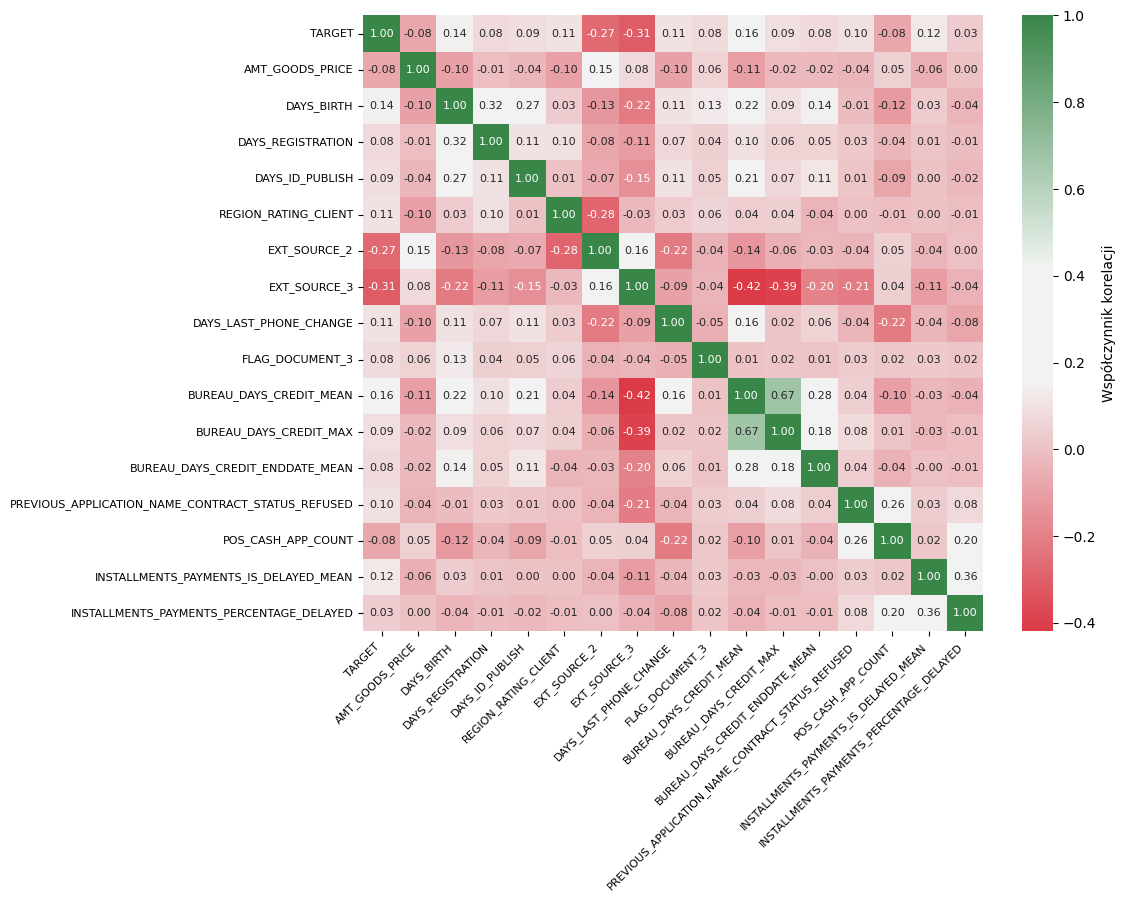

In [5]:
numeric_variables = df_train.select_dtypes(include=[np.number])

corr = numeric_variables.corr()

# Reset indeksu, aby przygotować DataFrame do wykresu
corr_df = corr.stack().reset_index()
corr_df.columns = ['Var1', 'Var2', 'Correlation']

# Tworzenie wykresu
plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(10, 133, sep=50, as_cmap=True)  # Custom palette
heatmap = sns.heatmap(corr, annot=True, fmt=".2f", cmap=cmap, cbar_kws={'label': 'Współczynnik korelacji'}, annot_kws={"size": 8})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=8)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=8)

plt.show()